In [70]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']

In [86]:
filter_method = 'LOWESS'
system = 'Duffing'
n_states = 2
noise_lvl = 0.1
## READ JSON FILE
filename = system+'_'+filter_method+'_gcv_noise_'+str(noise_lvl).replace('.','d')+'.json'
filepath = 'data_files/'+system+'/'+filter_method+'/'+filename
with open(filepath) as f:
  gcv_dict = json.load(f)

In [87]:
##PLOTTING STYLES
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

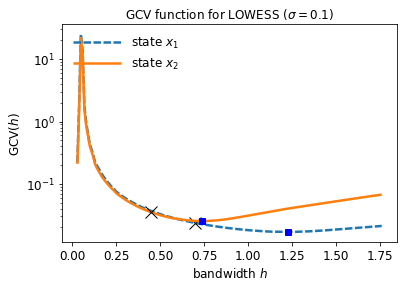

In [88]:
plt.close('all')
fig,ax = plt.subplots()


for state in range(n_states):

    h_range = gcv_dict[f'state{state+1}:bandwidth']
    gcv = gcv_dict[f'state{state+1}:gcv_func']
    min_error_h = gcv_dict[f'state{state+1}:min_error_h']
    min_error_gcv = gcv_dict[f'state{state+1}:min_error_gcv']
    min_gcv_h = gcv_dict[f'state{state+1}:min_gcv_h']
    min_gcv = gcv_dict[f'state{state+1}:min_gcv']
    
    ax.plot(h_range, gcv, lw=2.5,dashes=dashesStyles[state%len(dashesStyles)],label=f'state $x_{state+1}$')
    ax.plot(min_error_h, min_error_gcv,'kx', markersize = 12)
    ax.plot(min_gcv_h, min_gcv, 'bs')
    
    ax.set_yscale("log")
    ax.set_ylabel("GCV($h$)", size = 12)
    ax.set_xlabel("bandwidth $h$", size = 12)
    ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=2)
    ax.tick_params(labelsize = 12)
    ax.yaxis.tick_left()
    nameOfPlot = f"GCV function for LOWESS ($\sigma = {noise_lvl}$)"
    ax.set_title(nameOfPlot, size = 12)
    ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=4, fontsize = 12)

In [90]:
fig_format = 'svg'

filename = system+'_'+filter_method+f'_gcv_noise_'+str(noise_lvl).replace('.','d')+'.'+fig_format
fig.savefig(filename, format=fig_format, dpi=600)